In [2]:
### Author: Leonie Küchenhoff
### Date: October 2022
### Purpose of script: 
### 1. Plot total number of tissue specific and common variants
### 2. Plot allele frequency of A to G mutations
### 3. Plot allele frequency of on-target edits

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
from config import basedir, outdir

In [4]:
os.chdir(basedir)
outdir = str(outdir + '/AF/')
print('This base directory will be used:\n', basedir)
os.chdir(basedir)

This base directory will be used:
 /g/steinmetz/project/leonie_crispr/03_data/01_heartproject/snakemake_vcf/


In [5]:
# define filtering method (will only be used in saving of plots)
filter = '1ed'
#define sample names
names = ['279', '282', '450']
# Path to tissue specific variants
paths_spec = [f'merged/txt_files/ad_hc_mu/HLT{i}.specific.txt' for i in names]
# Path to all filtered variants
paths = [f'merged/txt_files/ad_hc_mu/HLT{i}.overlap_three_readabove4_above2_1ed.txt' for i in names]

col1 = 'ad_h'
col2 = 'ad_l'
col3 = 'ad_t'

In [6]:
# read in filtered data and exclude X / Y chromosome
file_dict = {}
for i in zip(paths_spec, names):
    df = pd.read_csv(i[0], delimiter = '\t')
    file_dict[i[1]] = df[(df['chr'] != 'chrY') & (df['chr'] != 'chrX')]

In [7]:
def get_sets(df):
    '''
    function that returns the df with de novo variants and list of indices with de novo variants in heart, liver & tail
    '''
    unknown = df[(df['known_dbsnp']== False) & (df['known_mgp'] == False)]
    setlist = np.arange(0, len(unknown))
    heart = setlist[unknown['heart']]
    liver = setlist[unknown['liver']]
    tail = setlist[unknown['tail']]
    return heart, liver, tail, unknown

In [8]:
venn_dict = {}
for i in names:
    venn_dict[i] = get_sets(file_dict[i])

In [9]:
# get df with only heart variants (no matter of heart specific or not)
heart_merge = pd.merge(venn_dict['279'][3][venn_dict['279'][3]['heart'] == True], venn_dict['282'][3][venn_dict['282'][3]['heart'] == True], how = 'outer', on = ['chr', 'pos', 'ref', 'alt'],  suffixes = ['279', '282'])
heart_merge = pd.merge(heart_merge, venn_dict['450'][3][venn_dict['450'][3]['heart'] == True], how = 'outer', on = ['chr', 'pos', 'ref', 'alt'])
setlist = np.arange(len(heart_merge))
heart279 = setlist[heart_merge['heart279'].fillna(False)]
heart282 = setlist[heart_merge['heart282'].fillna(False)]
heart450 = setlist[heart_merge['heart'].fillna(False)]

### Heart specific variants

In [36]:
# tissue specific variants that were only measured in heart
heart_spec_279 = venn_dict['279'][3][(venn_dict['279'][3]['heart'] == True)] 
heart_spec_282 = venn_dict['282'][3][(venn_dict['282'][3]['heart'] == True)] 
heart_spec_450 = venn_dict['450'][3][(venn_dict['450'][3]['heart'] == True)] 

In [38]:
# merge to one file and fill NA
heart_spec_merge = pd.merge(heart_spec_279,heart_spec_282, how = 'outer', on = ['chr', 'pos', 'ref', 'alt'],  suffixes = ['279', '282'])
heart_spec_merge_3 = pd.merge(heart_spec_merge, heart_spec_450, how = 'outer', on = ['chr', 'pos', 'ref', 'alt'])
setlist_spec_3 = np.arange(len(heart_spec_merge_3))
heart279_spec_3 = setlist_spec_3[heart_spec_merge_3['heart279'].fillna(False)]
heart282_spec_3 = setlist_spec_3[heart_spec_merge_3['heart282'].fillna(False)]
heart450_spec_3 = setlist_spec_3[heart_spec_merge_3['heart'].fillna(False)]

### Liver specific variants

In [39]:
# tissue specific variants that were not measured in other two tissues
liver_spec_279 = venn_dict['279'][3][(venn_dict['279'][3]['liver'] == True)] 
liver_spec_282 = venn_dict['282'][3][(venn_dict['282'][3]['liver'] == True)] 
liver_spec_450 = venn_dict['450'][3][(venn_dict['450'][3]['liver'] == True)]

In [40]:
# merge to one file and fill NA
liver_spec_merge = pd.merge(liver_spec_279,liver_spec_282, how = 'outer', on = ['chr', 'pos', 'ref', 'alt'],  suffixes = ['279', '282'])
liver_spec_merge_3 = pd.merge(liver_spec_merge, liver_spec_450, how = 'outer', on = ['chr', 'pos', 'ref', 'alt'])
setlist_spec_3 = np.arange(len(liver_spec_merge_3))
liver279_spec_3 = setlist_spec_3[liver_spec_merge_3['liver279'].fillna(False)]
liver282_spec_3 = setlist_spec_3[liver_spec_merge_3['liver282'].fillna(False)]
liver450_spec_3 = setlist_spec_3[liver_spec_merge_3['liver'].fillna(False)]

### Tail specific variants

In [41]:
# tissue specific variants that were not measured in other two tissues
tail_spec_279 = venn_dict['279'][3][(venn_dict['279'][3]['heart'] == False) & (venn_dict['279'][3]['tail'] == True) & (venn_dict['279'][3]['liver'] == False)] 
tail_spec_282 = venn_dict['282'][3][(venn_dict['282'][3]['heart'] == False) & (venn_dict['282'][3]['tail'] == True) & (venn_dict['282'][3]['liver'] == False)] 
tail_spec_450 = venn_dict['450'][3][(venn_dict['450'][3]['heart'] == False) & (venn_dict['450'][3]['tail'] == True) & (venn_dict['450'][3]['liver'] == False)] 

In [26]:
# merge to one file and fill NA
tail_spec_merge_3 = pd.merge(tail_spec_279,tail_spec_282, how = 'outer', on = ['chr', 'pos', 'ref', 'alt'],  suffixes = ['279', '282'])
tail_spec_merge_3 = pd.merge(tail_spec_merge_3, tail_spec_450, how = 'outer', on = ['chr', 'pos', 'ref', 'alt'])
setlist_spec_3 = np.arange(len(tail_spec_merge_3))
tail279_spec_3 = setlist_spec_3[tail_spec_merge_3['tail279'].fillna(False)]
tail282_spec_3 = setlist_spec_3[tail_spec_merge_3['tail282'].fillna(False)]
tail450_spec_3 = setlist_spec_3[tail_spec_merge_3['tail'].fillna(False)]

### Common overlap three tissues

In [10]:
def get_af(df, col1 = 'AD|h_mu', col2 = 'AD|l_mu', col3 = 'AD|t_mu'):
    mouse_ad = df[[col1, col2, col3]]
    allel1 = mouse_ad.applymap(lambda x: int(x.split(',')[0]) if pd.notnull(x) else 2).to_numpy()
    allel2 = mouse_ad.applymap(lambda x: int(x.split(',')[1]) if pd.notnull(x) else -1).to_numpy()
    af = allel2 / (allel1 + allel2)
    af = np.nan_to_num(af, 0)
    return af

In [11]:
# read in filtered data and exclude X / Y chromosome
file_dict_comm = {}
for i in zip(paths, names):
    df = pd.read_csv(i[0], delimiter = '\t')
    file_dict_comm[i[1]] = df[(df['chr'] != 'chrY') & (df['chr'] != 'chrX')]

venn_dict_comm = {}
for i in names:
    venn_dict_comm[i] = get_sets(file_dict_comm[i])

In [12]:
# filter for variants present in all three tissues
common_279 = venn_dict_comm['279'][3][(venn_dict_comm['279'][3]['heart'] == True) & (venn_dict_comm['279'][3]['tail'] == True) & (venn_dict_comm['279'][3]['liver'] == True)] 
common_282 = venn_dict_comm['282'][3][(venn_dict_comm['282'][3]['heart'] == True) & (venn_dict_comm['282'][3]['tail'] == True) & (venn_dict_comm['282'][3]['liver'] == True)] 
common_450 = venn_dict_comm['450'][3][(venn_dict_comm['450'][3]['heart'] == True) & (venn_dict_comm['450'][3]['tail'] == True) & (venn_dict_comm['450'][3]['liver'] == True)]

# variants should have AF of > 0 in all three tissues
af = get_af(common_279, col1, col2, col3) 
common_279_3 = common_279.iloc[np.where((af[:,0]!=0) &(af[:,1]!=0) &(af[:,2]!=0))]
af = get_af(common_282, col1, col2, col3)
common_282_3 = common_282.iloc[np.where((af[:,0]!=0) &(af[:,1]!=0) &(af[:,2]!=0))]
af = get_af(common_450, col1, col2, col3)
common_450_3 = common_450.iloc[np.where((af[:,0]!=0) &(af[:,1]!=0) &(af[:,2]!=0))]

In [55]:
# calculate number of variants per sample and tissue
lenght_279 = [len(heart_spec_279),len(liver_spec_279),len(tail_spec_279),len(common_279_3)]
lenght_282 = [len(heart_spec_282),len(liver_spec_282),len(tail_spec_282),len(common_282_3)]
lenght_450 = [len(heart_spec_450),len(liver_spec_450),len(tail_spec_450),len(common_450_3)]

In [57]:
x = ['heart', 'liver', 'tail', 'common']
df_plot = pd.DataFrame([lenght_279, lenght_282, lenght_450]).T.rename(columns= {0:'279', 1:'282', 2:'450'})
df_plot['tissue'] = x
df_plot = df_plot.melt(id_vars = 'tissue')

In [23]:
plt.rcParams.update({'font.size':18, 'text.usetex': False,
"svg.fonttype": 'none'})

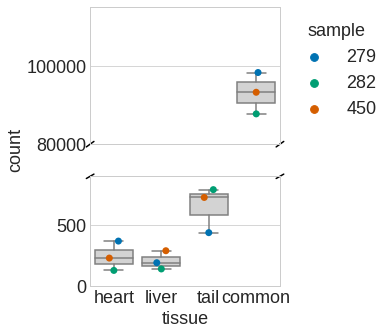

In [59]:
fig, ax = plt.subplots(2,1, figsize = (5.5,5), sharex = True, gridspec_kw= {'height_ratios': [5,4]})
plt.style.use('seaborn-colorblind')
plt.style.use('seaborn-whitegrid')

sns.boxplot(x = 'tissue', y = 'value', data = df_plot, ax = ax[0], color = 'lightgrey')
sns.swarmplot(x = 'tissue', y = 'value', data = df_plot, hue = 'variable', ax = ax[0], size = 7)
sns.boxplot(x = 'tissue', y = 'value', data = df_plot, ax = ax[1], color = 'lightgrey')
sns.swarmplot(x = 'tissue', y = 'value', data = df_plot, hue = 'variable', ax = ax[1], size = 7)

ax[0].set_ylabel('')
ax[1].set_ylabel('')
ax[0].get_xaxis().set_visible(False)

d = .02  # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax[0].transAxes, color="k", clip_on=False)
ax[0].plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax[0].plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
kwargs.update(transform=ax[1].transAxes)  # switch to the bottom axes
ax[1].plot((-d, +d), (1 - d,1+ d), **kwargs)  # bottom-left diagonal
ax[1].plot((1 - d, 1 + d), (1 - d, 1+ d), **kwargs)  # bottom-right diagonal
ax[0].set_ylim(80000,115000)
ax[1].set_ylim(0,900)
ax[0].set_xlabel('SNV')
ax[0].set_ylabel('')
ax[1].get_legend().remove()
ax[0].legend(bbox_to_anchor = (1, 1), loc = 'upper left', title = 'sample')

fig.text(0, 0.55, "count", va="center", rotation="vertical")
fig.tight_layout()
plt.show()

# save plot and data

#fig.savefig(f'{outdir}/venntobox_{filter}_tissuespec_noyx.pdf', bbox_inches = 'tight')
#fig.savefig(f'{outdir}/venntobox_{filter}_tissuespec_noyx.svg', bbox_inches = 'tight')

save = df_plot.rename(columns = {'value': 'count', 'variable': 'sample'})
#save.to_csv(f'{outdir}/tissue_spec_variantnumbers.csv', index = None)

## AF distribution tissue specific variants

### AF distribution for A>G / T>C mutations

In [60]:

def snp_table(df):
    '''
    function to get the summary statistics on which snps
    were measured how many times
    returns only A > G mutations
    '''
    df_germ = df.copy()

    #get one df with ref and alt for easier handling
    df_germ.loc[:,'replacement'] = df_germ['ref'] + df_germ['alt']
    # group each snp with its reverse snp
    df_germ.loc[df_germ['replacement'] == 'GA', 'replacement'] = 'CT'
    df_germ.loc[df_germ['replacement'] == 'GT', 'replacement'] = 'CA'
    df_germ.loc[df_germ['replacement'] == 'GC', 'replacement'] = 'CG'
    df_germ.loc[df_germ['replacement'] == 'AT', 'replacement'] = 'TA'
    df_germ.loc[df_germ['replacement'] == 'AG', 'replacement'] = 'TC'
    df_germ.loc[df_germ['replacement'] == 'AC', 'replacement'] = 'TG'

    # rename columns for plot
    df_germ.loc[df_germ['replacement'] == 'CA', 'replacement']= f'C>A\nG>T'
    df_germ.loc[df_germ['replacement'] == 'CG', 'replacement']= f'C>G\nG>C'
    df_germ.loc[df_germ['replacement'] == 'CT', 'replacement']= f'C>T\nG>A'
    df_germ.loc[df_germ['replacement'] == 'TA', 'replacement']= f'T>A\nA>T'
    df_germ.loc[df_germ['replacement'] == 'TC', 'replacement']= f'T>C\nA>G'
    df_germ.loc[df_germ['replacement'] == 'TG', 'replacement']= f'T>G\nA>C'


    return df_germ[df_germ['replacement'] == f'T>C\nA>G']

In [61]:
colors = [sns.color_palette('colorblind')[3],
          sns.color_palette('colorblind')[2],
          sns.color_palette('colorblind')[1],
          sns.color_palette('colorblind')[0],
          'white',
          sns.color_palette('colorblind')[4],
          sns.color_palette('colorblind')[5],
          sns.color_palette('colorblind')[6],
          sns.color_palette('colorblind')[7],
          sns.color_palette('colorblind')[8]
          ]
costum_palette = sns.color_palette(colors)

In [ ]:
# get AF of A to G mutations per sample and tissue
a = {'heart':get_af(snp_table(heart_spec_279), col1, col2, col3)[:,0], 'liver':get_af(snp_table(liver_spec_279), col1, col2, col3)[:,1], 'tail': get_af(snp_table(tail_spec_279), col1, col2, col3)[:,2]}
sample_279 = pd.DataFrame.from_dict(a, orient = 'index').T.melt().dropna()

a = {'heart':get_af(snp_table(heart_spec_282), col1, col2, col3)[:,0], 'liver':get_af(snp_table(liver_spec_282), col1, col2, col3)[:,1], 'tail': get_af(snp_table(tail_spec_282), col1, col2, col3)[:,2]}
sample_282 = pd.DataFrame.from_dict(a, orient = 'index').T.melt().dropna()

a = {'heart':get_af(snp_table(heart_spec_450), col1, col2, col3)[:,0], 'liver':get_af(snp_table(liver_spec_450), col1, col2, col3)[:,1], 'tail': get_af(snp_table(tail_spec_450), col1, col2, col3)[:,2]}
sample_450 = pd.DataFrame.from_dict(a, orient = 'index').T.melt().dropna()


In [64]:
plot = pd.concat([sample_279, sample_282, sample_450], keys = [279, 282, 450], names =['sample', 'i']).reset_index(level = 0)

In [65]:
colors = [sns.color_palette('colorblind')[3],
          sns.color_palette('colorblind')[2],
          sns.color_palette('colorblind')[0],
          sns.color_palette('colorblind')[1],
          'white',
          sns.color_palette('colorblind')[4],
          sns.color_palette('colorblind')[5],
          sns.color_palette('colorblind')[6],
          sns.color_palette('colorblind')[7],
          sns.color_palette('colorblind')[8]
          ]
costum_palette = sns.color_palette(colors)

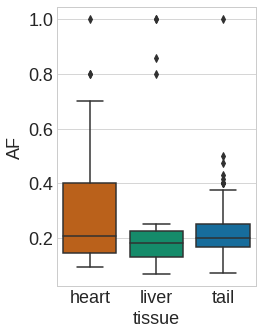

In [77]:
fig, ax = plt.subplots(1, figsize = (4,5))
plt.style.use('seaborn-colorblind')
plt.style.use('seaborn-whitegrid')
sns.boxplot(x = 'variable', y = 'value', data = plot, ax = ax, palette = costum_palette)
ax.set_xlabel('tissue')
ax.set_ylabel('AF')
fig.tight_layout()
plt.show()

# save figure

#fig.savefig(f'{outdir}/venntobox_{filter}_tissuespec_noyx_AG_violin.pdf', bbox_inches = 'tight')
#fig.savefig(f'{outdir}/venntobox_{filter}_tissuespec_noyx_AG_violin.svg', bbox_inches = 'tight')
#plot.rename(columns = {'variable':'tissue', 'value':'AF'}).to_csv(f'{outdir}/venntobox_{filter}_tissuespec_noyx_AG.csv', index = False)

### AF of on-target variants

In [13]:
# extract on-target mutations for each sample
on_target_279 = file_dict_comm['279'][(file_dict_comm['279']['chr'] == 'chr19') & (file_dict_comm['279']['pos'] == 53843240)& (file_dict_comm['279']['alt'] == 'T')].head()
on_target_282 = file_dict_comm['282'][(file_dict_comm['282']['chr'] == 'chr19') & (file_dict_comm['282']['pos'] == 53843240)& (file_dict_comm['282']['alt'] == 'T')].head()
on_target_450 = file_dict_comm['450'][(file_dict_comm['450']['chr'] == 'chr19') & (file_dict_comm['450']['pos'] == 53843240)& (file_dict_comm['450']['alt'] == 'T')].head()

In [14]:
# calculate AF
# note: because the on-target edit reverts the genome back to the reference seq, 1 - AF is the correct AF of the edit
on_target_279af = ((get_af(on_target_279)) * -1) + 1
on_target_282af = ((get_af(on_target_282)) * -1) + 1
on_target_450af = ((get_af(on_target_450)) * -1) + 1

In [15]:
ad = np.zeros((9,2))
for count, i in enumerate([on_target_279, on_target_282, on_target_450]):
    # for each sample, save number of reads for heart, liver & tail in numpy array
    mouse_ad = i[['AD|h_mu','AD|l_mu','AD|t_mu']]
    allel1 = mouse_ad.applymap(lambda x: int(x.split(',')[0])).to_numpy()
    allel2 = mouse_ad.applymap(lambda x: int(x.split(',')[1])).to_numpy()
    ad[[0+count,3+count,6+count], 0] = allel1
    ad[[0+count,3+count,6+count], 1] = allel2

In [18]:
# summarize all info into pandas df
test = pd.DataFrame(np.array([on_target_279af[0], on_target_282af[0], on_target_450af[0]]), columns = ['heart','liver', 'tail'])
test = test.melt(var_name = 'tissue', value_name = 'AF')
test['ALT_reads'] = ad[:,0]
test['REF_reads'] = ad[:,1]
test['total_reads'] = test['ALT_reads'] + test['REF_reads']
test['mouse'] = [279, 282, 450, 279, 282, 450, 279, 282, 450]
# save as table
#test.to_csv('{outdir}/on_target_AF.txt', index = False)

In [21]:
# calculate sum of reads per tissue
reads = np.zeros((3,3))
for count, i in enumerate([on_target_279, on_target_282, on_target_450]):
    mouse_ad = i[['AD|h_mu','AD|l_mu','AD|t_mu']]
    allel1 = mouse_ad.applymap(lambda x: int(x.split(',')[0])).to_numpy()
    allel2 = mouse_ad.applymap(lambda x: int(x.split(',')[1])).to_numpy()
    sum = (allel1 + allel2)
    reads[count] = sum
reads_per_tissue = reads.sum(axis = 0)

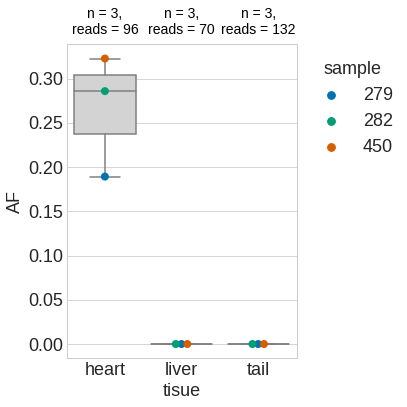

In [24]:
fig, ax = plt.subplots(1,1, figsize = (6,6), sharey = True)
plt.style.use('seaborn-colorblind')
plt.style.use('seaborn-whitegrid')
ax = sns.boxplot(x="tissue", y="AF", data=test, color = 'lightgrey')
ax = sns.swarmplot(x="tissue", y="AF", data=test, hue="mouse", size = 8)
ax.set_xlabel('tissue')
ax.set_ylabel('AF')
for count, xtick in enumerate(ax.get_xticks()):
    ax.text(xtick,0.35, f'n = 3,\nreads = {int(reads_per_tissue[count])}',
            horizontalalignment='center',color='black', size = 14)
ax.legend(bbox_to_anchor = (1, 1), loc = 'upper left', title = 'sample')
fig.tight_layout()
plt.show()

# save figure

#fig.savefig(f'{outdir}/ontarget_AF.pdf', bbox_inches = 'tight')
#fig.savefig(f'{outdir}/ontarget_AF.svg', bbox_inches = 'tight')